In [1]:
# This notebook is the continuation of the jupyter notebook "web scraping" for PTT. Now that we have all the text
# converted into a excel file, we want to clean the data so that it is sutible for analysis. 
# 這本是上一本的延續，從用beautifulSoup 得到的PTT 資料，我們的目的現在是要將那些資料分解，然後做分析。
# 我們會用‘結巴’來做分解

# Import libraries
import jieba
import pandas as pd

In [2]:
# now lets import our dataframe
# import 我們的數據

df = pd.read_excel(r"C:\Users\tiger\Desktop\jupyter notebook works\ptt\ptt.xlsx.xlsx")

In [3]:
# 我們只需要最後一排

x = df.iloc[:, -1].values

In [4]:
# 用 regular expression 來吧標點符號給去掉
import string
import re

context = []
for i in  x:
    i = re.sub("[a-z]+","",i) # removes any english
    i = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",i) #removes chinese punctuation
    i = re.sub("[【】╮╯▽╰╭★→「」]+","",i)  #removes chinese punctuation
    i = re.sub("！，❤。～《》：（）【】「」？”“；：、","",i)  #removes chinese punctuation
    i = re.sub(r'[^\w\s]','',i)   # removes english punctuation
    if i != '':
        context.append(i)
        

In [5]:
# 用結巴來做 NLP

lst = []
for i in context:
    seg_list = jieba.cut_for_search(i) 
    lst.append(list(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tiger\AppData\Local\Temp\jieba.cache
Loading model cost 0.553 seconds.
Prefix dict has been built successfully.


In [19]:
# 現在的問題在於我們有很多list inside a list. 
# 用兩個loop 把全部的東西放在一個list裏頭

final_lst = []
for i in lst:
    for j in i:
        final_lst.append(j)
        
        

In [30]:
file = open(r"C:\Users\tiger\Desktop\jupyter notebook works\ptt\中文停詞用表.txt", encoding="utf8")

file = file.read().split()

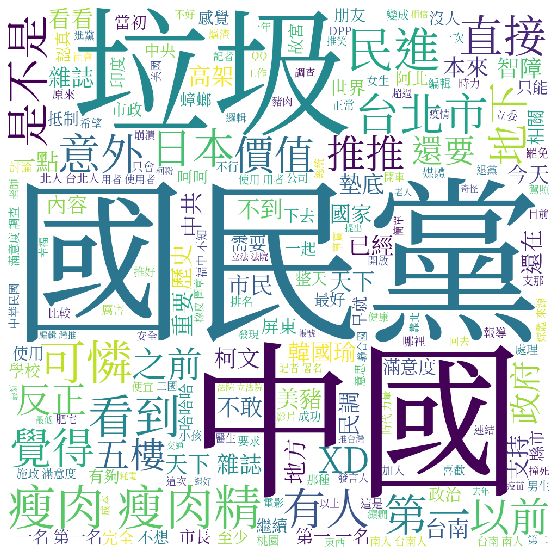

In [31]:
# 最後我們來把這些做成文字雲圖

from wordcloud import WordCloud, STOPWORDS   # 用來做文字雲的library
import matplotlib.pyplot as plt

words = ''
stopwords = file

# Chinese fonts must be set
font_path = (r"C:\Users\tiger\Desktop\jupyter notebook works\ptt\SourceHanSerifTC-Regular.otf")

# 用 for loop to iterate through all text
for i in final_lst:
    words += i + " "
    
wordcloud = WordCloud(font_path=font_path, 
                      width = 1000, 
                      height = 1000, 
                      background_color = 'white', 
                      stopwords = stopwords).generate(words)

# plotting the image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()